In [1]:
# It allows you to perform various operations related to file and directory management.
import os

# for visualizations and draw visual diagrams
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# for mathematical operations:
import pandas as pd #for data manipulation and analysis. It provides DataFrames and Series data structures.
import numpy as np #fundamental library for numerical and scientific computing in Python.


# This function is used to read images from image files.
from matplotlib.image import imread

In [3]:
# Lists created to store paths of images.
par_img_path = [] 
uninf_img_path = []

for image_path in os.listdir('C:/Users/Navid HG/Desktop/Final Desktop/All Related Thesis Files/Codes/MalariaLikeCodes/DataSets/MainData/cell_images/Parasitized/'): # Iterate through all the image names within the 'Parasitized' folder.
    par_img_path.append('C:/Users/Navid HG/Desktop/Final Desktop/All Related Thesis Files/Codes/MalariaLikeCodes/DataSets/MainData/cell_images/Parasitized/' + image_path) # Generate the file path for the specific image.
    
for image_path in os.listdir('C:/Users/Navid HG/Desktop/Final Desktop/All Related Thesis Files/Codes/MalariaLikeCodes/DataSets/MainData/cell_images/Uninfected/'): # Iterate through all the image names within the 'Uninfected' folder.
    uninf_img_path.append('C:/Users/Navid HG/Desktop/Final Desktop/All Related Thesis Files/Codes/MalariaLikeCodes/DataSets/MainData/cell_images/Uninfected/' + image_path) # Generate the file path for the specific image.
    
cell_type_par = len(par_img_path) * ['parasitized'] # Generate a list where all values are 'parasitized,' and the length of the list matches the length of the `par_img_path` list.
cell_type_uninf = len(uninf_img_path) * ['uninfected'] # Generate a list where all values are 'uninfected,' and the length of the list matches the length of the `uninf_img_path` list.

# Construct a DataFrame that includes a column containing the paths of parasitized images and another column with labels obtained from `cell_type_par`.
df_par = pd.DataFrame({'image_path': par_img_path, 'cell_type': cell_type_par}) 
# Construct a DataFrame that includes a column containing the paths of parasitized images and another column with labels obtained from `cell_type_uninf`.
df_uninf = pd.DataFrame({'image_path': uninf_img_path, 'cell_type': cell_type_uninf})

df = pd.concat([df_par, df_uninf]) # Combine both dataframes along rows to get the final dataframe.

df = df.reset_index(drop=True) # reset index to be from 0 to length of dataframe. drop=True drops the initial index, which otherwise is added as a new column
df

,image_path,cell_type
0,C:/Users/Navid HG/Desktop/Final Desktop/All Re...,parasitized
1,C:/Users/Navid HG/Desktop/Final Desktop/All Re...,parasitized
2,C:/Users/Navid HG/Desktop/Final Desktop/All Re...,parasitized
3,C:/Users/Navid HG/Desktop/Final Desktop/All Re...,parasitized
4,C:/Users/Navid HG/Desktop/Final Desktop/All Re...,parasitized
...,...,...
26867,C:/Users/Navid HG/Desktop/Final Desktop/All Re...,uninfected
26868,C:/Users/Navid HG/Desktop/Final Desktop/All Re...,uninfected
26869,C:/Users/Navid HG/Desktop/Final Desktop/All Re...,uninfected
26870,C:/Users/Navid HG/Desktop/Final Desktop/All Re...,uninfected


In [3]:
#imports a specific function for splitting a dataset into two subsets.
from sklearn.model_selection import train_test_split 

# In this dataset, 15% of the data is separated for testing.
train_par, test_par = train_test_split(df[df['cell_type'] == 'parasitized'],test_size=0.15) 

In [4]:
# The test set comprises 15% of the total available data.
train_uninf, test_uninf = train_test_split(df[df['cell_type'] == 'uninfected'],test_size=0.15)

In [5]:
# concatenating (combining) two or more pandas objects, such as Series or DataFrames.
df_train = pd.concat([train_par, train_uninf])
df_test = pd.concat([test_par, test_uninf])

In [6]:

# Define image dimensions
image_shape = (130, 130, 3)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras.layers import MaxPooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix



from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model


In [8]:
MobileNetV2_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=image_shape )

In [9]:
# Freeze the convolutional layers
for layer in MobileNetV2_model.layers:
    layer.trainable = False

In [10]:
# Add Global Average Pooling and additional dense layers
x = GlobalAveragePooling2D()(MobileNetV2_model.output)
x = Dense(1024, activation='relu', kernel_initializer='he_uniform')(x)
x = Dropout(0.5)(x)  # Add dropout for regularization

# Output layer for binary classification
predictions = Dense(1, activation='sigmoid', kernel_initializer='he_uniform')(x)

# Create the final model
MobileNetV2 = Model(inputs=MobileNetV2_model.input, outputs=predictions)

In [11]:
MobileNetV2_model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 130, 130, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 65, 65, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 65, 65, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 65, 65, 32)           0         ['bn_Conv1[

In [12]:
# Compile the model with Adam optimizer and binary cross-entropy loss
MobileNetV2.compile(loss='binary_crossentropy',
                  optimizer=Adam(learning_rate=0.0001),  # Adjust learning rate as needed
                  metrics=['accuracy'])

In [13]:
MobileNetV2.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 130, 130, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 65, 65, 32)           864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 65, 65, 32)           128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (None, 65, 65, 32)           0         ['bn_Conv1[0][0]']        

In [15]:
'''
from tensorflow.keras.utils import plot_model
from IPython.display import Image
plot_model(MobileNetV2, to_file='convnet.png', show_shapes=True,show_layer_names=True)
Image(filename='convnet.png')
'''

"\nfrom tensorflow.keras.utils import plot_model\nfrom IPython.display import Image\nplot_model(MobileNetV2, to_file='convnet.png', show_shapes=True,show_layer_names=True)\nImage(filename='convnet.png')\n"

In [14]:
# Import ImageDataGenerator class

train_datagen = ImageDataGenerator(rescale = 1/255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   height_shift_range=0.2,
                                   width_shift_range=0.2,
                                   rotation_range=40,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale = 1/255) # We can add more parameters for Data augmentation.

In [15]:
# generate batches for training 
training_set =  train_datagen.flow_from_dataframe(dataframe = df_train, 
                                                  x_col='image_path', # column in `dataframe` that contains the filenames
                                                  y_col='cell_type', # column in `dataframe` that has the target data
                                                  class_mode='binary', # because oyr dataset is binary
                                                  target_size=(130,130), # target image size (length, width)
                                                  batch_size=32); # add batch size

# generate batches for testing 
test_set = test_datagen.flow_from_dataframe(dataframe = df_test, 
                                            x_col='image_path', 
                                            y_col='cell_type', 
                                            class_mode='binary', 
                                            target_size=(130,130), 
                                            shuffle=False, 
                                            batch_size=32);

Found 22838 validated image filenames belonging to 2 classes.


c:\Users\Navid HG\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\preprocessing\image.py:1137: UserWarning: Found 2 invalid image filename(s) in x_col="image_path". These filename(s) will be ignored.
  warnings.warn(


Found 4032 validated image filenames belonging to 2 classes.


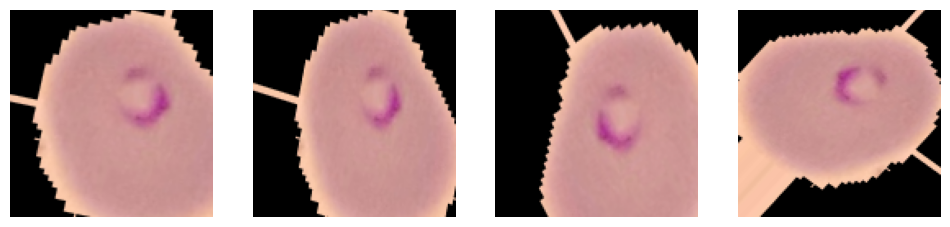

In [16]:
from keras.preprocessing import image
import matplotlib.pyplot as plt

# مسیر تصویر اصلی
image_path = 'C:/Users/Navid HG/Desktop/Codes/MalariaLikeCodes/DataSets/MainData/cell_images/Parasitized/C33P1thinF_IMG_20150619_115740a_cell_161.png'



img = image.load_img(image_path)
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)

# تعداد تصاویر مورد نظر برای نمایش تعیین می‌شود (به عنوان مثال، 4 تصویر)
num_images = 4
fig, ax = plt.subplots(1, num_images, figsize=(12, 4))

i = 0
for batch in train_datagen.flow(x, batch_size=1):
    ax[i].imshow(image.array_to_img(batch[0]))
    ax[i].axis('off')
    i += 1
    if i >= num_images:
        break

plt.show()


In [17]:
from tensorflow.keras.callbacks import EarlyStopping
# Early Stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)

In [18]:


# Train the model with data generators
MobileNetV2.fit(
    training_set,
    epochs=30,  # Adjust the number of epochs as needed
    validation_data=test_set,
    callbacks=[early_stop])


Epoch 1/50
714/714 [==============================] - 228s 316ms/step - loss: 0.2857 - accuracy: 0.8872 - val_loss: 0.1636 - val_accuracy: 0.9370
Epoch 2/50
714/714 [==============================] - 220s 307ms/step - loss: 0.2278 - accuracy: 0.9130 - val_loss: 0.1340 - val_accuracy: 0.9504
Epoch 3/50
714/714 [==============================] - 208s 291ms/step - loss: 0.2152 - accuracy: 0.9194 - val_loss: 0.1286 - val_accuracy: 0.9511
Epoch 4/50
714/714 [==============================] - 204s 286ms/step - loss: 0.2126 - accuracy: 0.9211 - val_loss: 0.1296 - val_accuracy: 0.9524
Epoch 5/50
714/714 [==============================] - 207s 289ms/step - loss: 0.2067 - accuracy: 0.9233 - val_loss: 0.1206 - val_accuracy: 0.9554
Epoch 6/50
714/714 [==============================] - 206s 288ms/step - loss: 0.2034 - accuracy: 0.9257 - val_loss: 0.1627 - val_accuracy: 0.9395
Epoch 7/50
714/714 [==============================] - 209s 293ms/step - loss: 0.2022 - accuracy: 0.9240 - val_loss: 0.1477 -

In [21]:
# the model.fit method returns a History callback, which has a history attribute containing the lists of successive losses and other metrics.
losses = pd.DataFrame(MobileNetV2.history.history) 

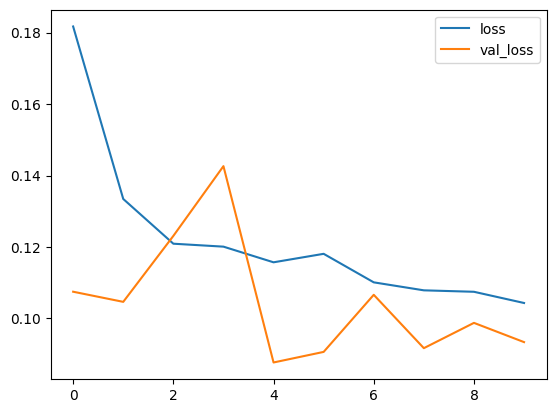

In [22]:
losses[['loss','val_loss']].plot(color=['#1f77b4', '#ff7f0e']);

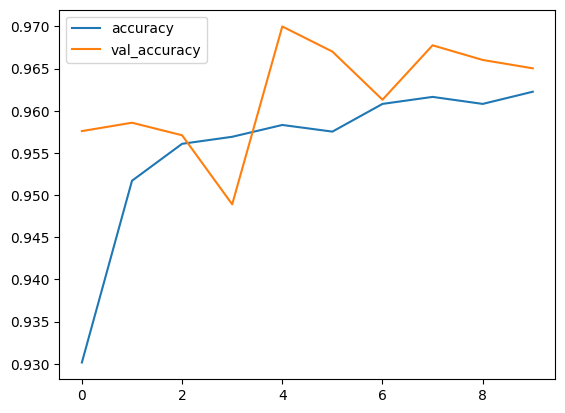

In [23]:
losses[['accuracy','val_accuracy']].plot(color=['#1f77b4', '#ff7f0e']);

In [24]:
pred_probabilities = MobileNetV2.predict(test_set) # this function returns probabilities of a parasitized  image and a uninfected image.
predictions = pred_probabilities > 0.5 # boolean predictions on test data, whether the model thinks an image is parasitized or uninfected

126/126 [==============================] - 23s 174ms/step


In [25]:
MobileNetV2.save('MobileNetV2_new_malaria.h5') # Model Save Function.

c:\Users\Navid HG\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [26]:
print(classification_report(test_set.classes,predictions))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96      2016
           1       0.95      0.98      0.97      2016

    accuracy                           0.97      4032
   macro avg       0.97      0.97      0.97      4032
weighted avg       0.97      0.97      0.97      4032



In [27]:
training_set.class_indices

{'parasitized': 0, 'uninfected': 1}

In [28]:
predictions # False=0, True=1

array([[False],
       [False],
       [False],
       ...,
       [ True],
       [ True],
       [ True]])

In [29]:
#plot_confusion_matrix does not work directly for neural networks
from sklearn.metrics import ConfusionMatrixDisplay

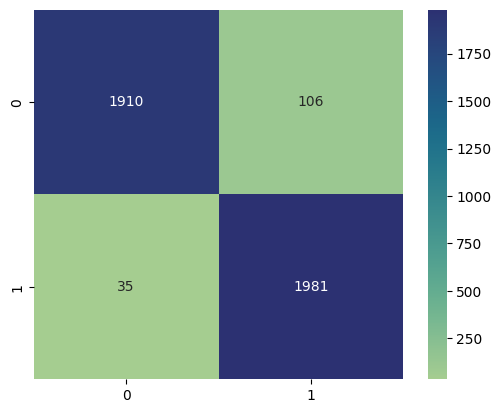

In [32]:
cm = confusion_matrix(df_test['cell_type'].map({'parasitized': 0, 'uninfected': 1}),predictions) # df_test has string labels. we need to convert it into boolean values
f = sns.heatmap(cm, annot=True, fmt='d', cmap='crest', square=True) # create a heatmap of confusion_matrix

In [33]:
MobileNetV2_accuracy = losses['val_accuracy'].iloc[-1].round(2) * 100
print('The final accuracy is:', MobileNetV2_accuracy)

The final accuracy is: 97.0
